## Task 1: Implement a simple feedforward neural network from scratch using NumPy. Train it on a small dataset.


In [1]:
import numpy as np
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(1)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return parameters


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = (A1, A2)
    return A2, cache
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return np.squeeze(cost)  # Ensure cost is a scalar


In [3]:
def backward_propagation(X, Y, cache, parameters):
    A1, A2 = cache
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    return grads


In [7]:
def update_parameters(parameters, grads, learning_rate=0.01):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return parameters


In [6]:
def train(X, Y, input_size, hidden_size, output_size, num_iterations=10000, learning_rate=0.01):
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(X, Y, cache, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 1000 == 0:
            print(f"Iteration {i}: cost = {cost}")
    
    return parameters


In [8]:
# Example data: XOR problem
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])  # Shape (2, 4)
Y = np.array([[0, 1, 1, 0]])  # Shape (1, 4)

parameters = train(X, Y, input_size=2, hidden_size=4, output_size=1)


Iteration 0: cost = 0.693148080871083
Iteration 1000: cost = 0.693147180194338
Iteration 2000: cost = 0.6931471801541472
Iteration 3000: cost = 0.6931471801540783
Iteration 4000: cost = 0.6931471801540112
Iteration 5000: cost = 0.693147180153944
Iteration 6000: cost = 0.6931471801538768
Iteration 7000: cost = 0.6931471801538095
Iteration 8000: cost = 0.6931471801537424
Iteration 9000: cost = 0.6931471801536752


## Task 2: Build a deep neural network using TensorFlow/Keras. Train it on the MNIST dataset for digit classification.

In [ ]:
pip install tensorflow


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension (required for convolutional layers)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])


C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.8916 - loss: 0.3462 - val_accuracy: 0.9835 - val_loss: 0.0535
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9841 - loss: 0.0492 - val_accuracy: 0.9891 - val_loss: 0.0330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9901 - val_loss: 0.0315
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.9891 - val_loss: 0.0328
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9908 - val_loss: 0.0270
313/313 - 2s - 8ms/step - accuracy: 0.9908 - loss: 0.0270

Test accuracy: 0.9908


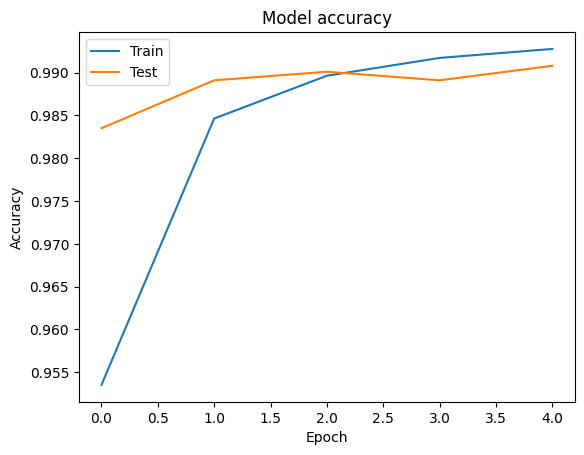

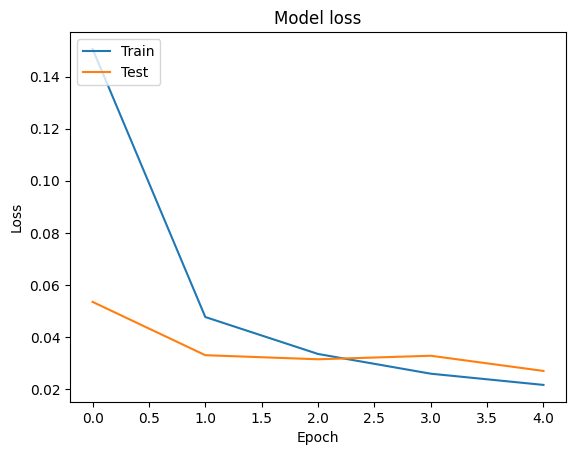

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Task 3: Implement regularization techniques (dropout, L2 regularization) to prevent overfitting in neural networks.


In [9]:
from tensorflow.keras import layers, models, regularizers

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension (required for convolutional layers)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]



In [10]:
# Define the model with Dropout and L2 Regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Apply dropout with a rate of 25%
    
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Apply dropout with a rate of 25%
    
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Apply dropout with a rate of 50%
    
    layers.Dense(10, activation='softmax')  # Output layer for classification
])


C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 28ms/step - accuracy: 0.7630 - loss: 1.3825 - val_accuracy: 0.9580 - val_loss: 0.4431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9239 - loss: 0.5552 - val_accuracy: 0.9640 - val_loss: 0.3904
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9298 - loss: 0.5070 - val_accuracy: 0.9673 - val_loss: 0.3622
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9342 - loss: 0.4789 - val_accuracy: 0.9708 - val_loss: 0.3463
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9384 - loss: 0.4540 - val_accuracy: 0.9682 - val_loss: 0.3337
313/313 - 2s - 8ms/step - accuracy: 0.9682 - loss: 0.3337

Test accuracy: 0.9682


## Task 4: Build and train a convolutional neural network (CNN) on the CIFAR-10 dataset. Achieve at least 70% accuracy.

In [12]:
from tensorflow.keras.datasets import cifar10

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model
model = models.Sequential([
    #convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 111s 1us/step


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.3497 - loss: 1.7459 - val_accuracy: 0.5680 - val_loss: 1.1983
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.5848 - loss: 1.1707 - val_accuracy: 0.6311 - val_loss: 1.0396
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6646 - loss: 0.9676 - val_accuracy: 0.6725 - val_loss: 0.9420
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.7058 - loss: 0.8428 - val_accuracy: 0.6832 - val_loss: 0.9154
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7330 - loss: 0.7644 - val_accuracy: 0.6943 - val_loss: 0.8900
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7538 - loss: 0.7091 - val_accuracy: 0.7122 - val_loss: 0.8361
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7723 - loss: 0.6482 - val_accuracy: 0.7142 - val_loss: 0.8393
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7890 -